# Project

## Data Processing

In [ ]:
import pandas as pd
df0 = pd.read_csv('https://dev.km2.ai/public/parcels_last.csv', low_memory=False) # 1.5 Gb, 2488394 lines, ~3 minutes

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485732 entries, 0 to 2485731
Data columns (total 55 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   id                           int64  
 1   ZIPcode                      object 
 2   TaxRateArea_CITY             object 
 3   AIN                          int64  
 4   RollYear                     int64  
 5   TaxRateArea                  int64  
 6   AssessorID                   object 
 7   PropertyLocation             object 
 8   PropertyType                 object 
 9   PropertyUseCode              object 
 10  GeneralUseType               object 
 11  SpecificUseType              object 
 12  SpecificUseDetail1           object 
 13  SpecificUseDetail2           object 
 14  totBuildingDataLines         int64  
 15  YearBuilt                    int64  
 16  EffectiveYearBuilt           int64  
 17  SQFTmain                     int64  
 18  Bedrooms                     int64  
 19  

In [ ]:
df1=df0[df0.TaxRateArea_CITY.isin(['LOS ANGELES'])]

In [ ]:
df2 = df1[['id','TaxRateArea_CITY','GeneralUseType','YearBuilt','SQFTmain','Bedrooms','TotalLandImpValue','netTaxableValue']]
df2.head()

,id,TaxRateArea_CITY,GeneralUseType,YearBuilt,SQFTmain,Bedrooms,TotalLandImpValue,netTaxableValue
108,93809,LOS ANGELES,Residential,1971,771,1,128000.0,121000.0
109,94845,LOS ANGELES,Residential,1971,792,1,180000.0,173000.0
110,95006,LOS ANGELES,Residential,1971,771,1,144000.0,144000.0
111,95262,LOS ANGELES,Residential,1971,792,1,0.0,0.0
112,95319,LOS ANGELES,Residential,1971,771,1,0.0,0.0


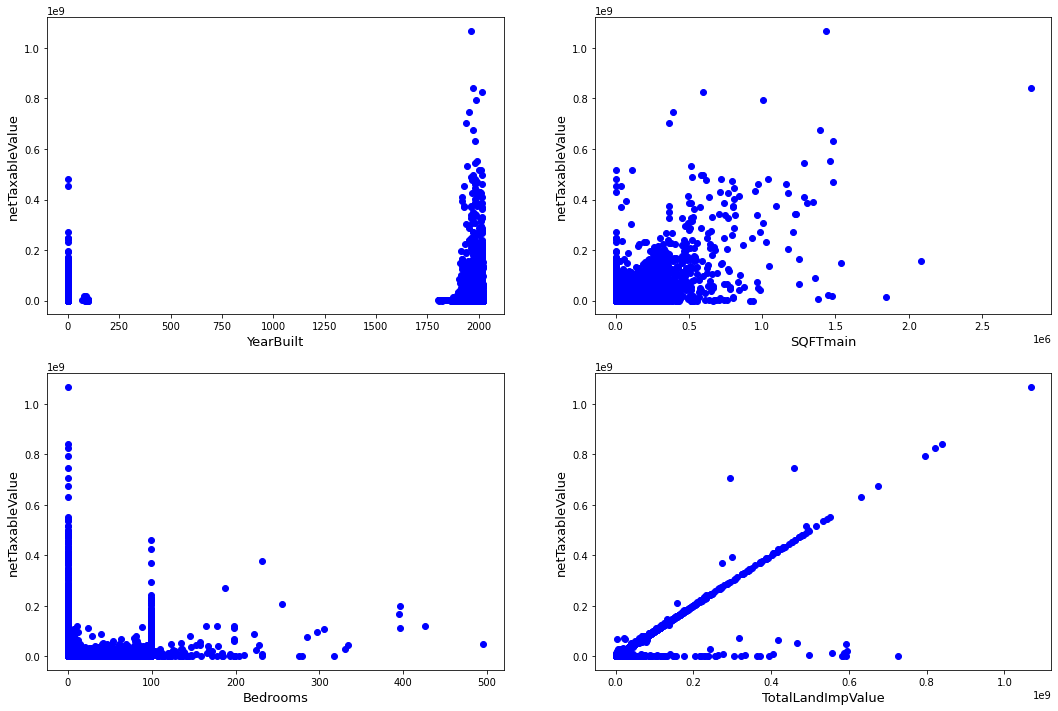

In [ ]:
#Independent Variables Overview
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))

plt.subplot(2, 2, 1)
plt.scatter(x=df2.YearBuilt, y=df2.netTaxableValue,color='b') 
plt.xlabel("YearBuilt", fontsize=13)
plt.ylabel("netTaxableValue", fontsize=13)

plt.subplot(2, 2, 2)
plt.scatter(x=df2.SQFTmain, y=df2.netTaxableValue,color='b') 
plt.xlabel("SQFTmain", fontsize=13)
plt.ylabel("netTaxableValue", fontsize=13)

plt.subplot(2, 2, 3)
plt.scatter(x=df2.Bedrooms, y=df2.netTaxableValue,color='b') 
plt.xlabel("Bedrooms", fontsize=13)
plt.ylabel("netTaxableValue", fontsize=13)    

plt.subplot(2, 2, 4)
plt.scatter(x=df2.TotalLandImpValue, y=df2.netTaxableValue,color='b') 
plt.xlabel("TotalLandImpValue", fontsize=13)
plt.ylabel("netTaxableValue", fontsize=13) 

plt.show()

In [ ]:
# Delete outliers
df2.drop(df2[(df2['YearBuilt']<1750) & (df2['netTaxableValue']> 1000000000)].index,inplace=True)
df2.drop(df2[(df2['SQFTmain']>1500000) & (df2['netTaxableValue']> 1000000000)].index,inplace=True)
df2.drop(df2[(df2['Bedrooms']>300) & (df2['netTaxableValue']> 1000000000)].index,inplace=True)
df2.drop(df2[(df2['TotalLandImpValue']>800000000) & (df2['netTaxableValue']> 1000000000)].index,inplace=True)
df2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,TaxRateArea_CITY,GeneralUseType,YearBuilt,SQFTmain,Bedrooms,TotalLandImpValue,netTaxableValue
108,93809,LOS ANGELES,Residential,1971,771,1,128000.0,121000.0
109,94845,LOS ANGELES,Residential,1971,792,1,180000.0,173000.0
110,95006,LOS ANGELES,Residential,1971,771,1,144000.0,144000.0
111,95262,LOS ANGELES,Residential,1971,792,1,0.0,0.0
112,95319,LOS ANGELES,Residential,1971,771,1,0.0,0.0


In [ ]:
# Reset the index
df2.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


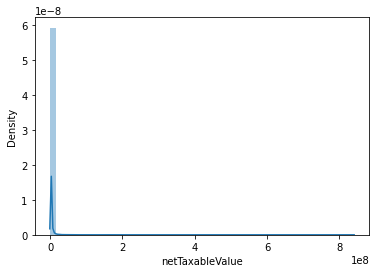

In [ ]:
# dependent Variables Analysis
import seaborn as sns
sns.distplot(df2['netTaxableValue'])

In [ ]:
total = df2.isnull().sum().sort_values(ascending=False)
percent = (df2.isnull().sum()/df2.isnull().count().sort_values(ascending=False))
missing_data=pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_data 
df2.dropna(how='any')

,id,TaxRateArea_CITY,GeneralUseType,YearBuilt,SQFTmain,Bedrooms,TotalLandImpValue,netTaxableValue
0,93809,LOS ANGELES,Residential,1971,771,1,128000.0,121000.0
1,94845,LOS ANGELES,Residential,1971,792,1,180000.0,173000.0
2,95006,LOS ANGELES,Residential,1971,771,1,144000.0,144000.0
3,95262,LOS ANGELES,Residential,1971,792,1,0.0,0.0
4,95319,LOS ANGELES,Residential,1971,771,1,0.0,0.0
...,...,...,...,...,...,...,...,...
828692,40111859,LOS ANGELES,Residential,1924,2236,4,287149.0,280149.0
828693,40112554,LOS ANGELES,Residential,1928,11766,5,333305.0,335205.0
828694,40114462,LOS ANGELES,Residential,0,0,0,98021.0,98021.0
828695,40119850,LOS ANGELES,Residential,1948,3447,5,388992.0,388992.0


In [ ]:
df3=df2.loc[df2['YearBuilt']!=0]

In [ ]:
df3.head()

,id,TaxRateArea_CITY,GeneralUseType,YearBuilt,SQFTmain,Bedrooms,TotalLandImpValue,netTaxableValue
0,93809,LOS ANGELES,Residential,1971,771,1,128000.0,121000.0
1,94845,LOS ANGELES,Residential,1971,792,1,180000.0,173000.0
2,95006,LOS ANGELES,Residential,1971,771,1,144000.0,144000.0
3,95262,LOS ANGELES,Residential,1971,792,1,0.0,0.0
4,95319,LOS ANGELES,Residential,1971,771,1,0.0,0.0


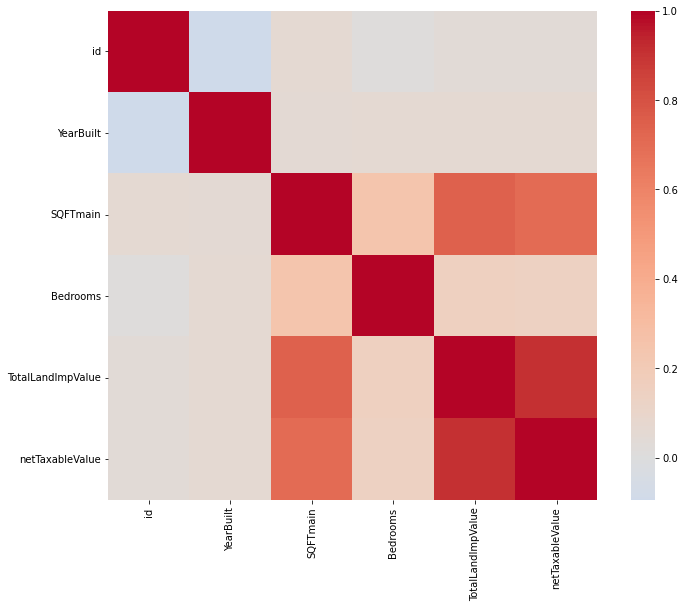

In [ ]:
corrmat=df3.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=1,square=True,center=0.0,cmap='coolwarm')

In [ ]:
type = pd.get_dummies(df3['GeneralUseType'])
type = pd.get_dummies(df3['GeneralUseType'], drop_first = True)
df4 = pd.concat([df3, type], axis = 1)
df4.drop(['GeneralUseType'], axis = 1, inplace = True)
df4

,id,TaxRateArea_CITY,YearBuilt,SQFTmain,Bedrooms,TotalLandImpValue,netTaxableValue,(unavailable),Commercial,Dry Farm,Industrial,Institutional,Irrigated Farm,Miscellaneous,Recreational,Residential
0,93809,LOS ANGELES,1971,771,1,128000.0,121000.0,0,0,0,0,0,0,0,0,1
1,94845,LOS ANGELES,1971,792,1,180000.0,173000.0,0,0,0,0,0,0,0,0,1
2,95006,LOS ANGELES,1971,771,1,144000.0,144000.0,0,0,0,0,0,0,0,0,1
3,95262,LOS ANGELES,1971,792,1,0.0,0.0,0,0,0,0,0,0,0,0,1
4,95319,LOS ANGELES,1971,771,1,0.0,0.0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828691,40110603,LOS ANGELES,1918,1104,1,37757.0,30757.0,0,0,0,0,0,0,0,0,1
828692,40111859,LOS ANGELES,1924,2236,4,287149.0,280149.0,0,0,0,0,0,0,0,0,1
828693,40112554,LOS ANGELES,1928,11766,5,333305.0,335205.0,0,0,0,0,0,0,0,0,1
828695,40119850,LOS ANGELES,1948,3447,5,388992.0,388992.0,0,0,0,0,0,0,0,0,1


## Models Selection

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)

df_train, df_test = train_test_split(df4, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train = df_train[['YearBuilt','SQFTmain','Bedrooms','TotalLandImpValue','(unavailable)','Commercial','Dry Farm','Industrial','Institutional','Irrigated Farm','Miscellaneous','Recreational','Residential']]
y_train = df_train['netTaxableValue']

### Multiple Linear Regression

In [ ]:
# Multiple Linear Regression
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm.astype(float)).fit()
lr_1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        netTaxableValue   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                 1.989e+05
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:57:13   Log-Likelihood:            -8.6440e+06
No. Observations:              536902   AIC:                         1.729e+07
Df Residuals:                  536888   BIC:                         1.729e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.377e+06   2.05e+05     -6.710      0.000   -1.78e+06   -9.75e+05
YearBuilt           774.8419    102.785      7.538      0.000     573.387     976.297
SQFTmain             15.0945      0.287     52.602      0.000      14.532      15.657
Bedrooms          -3129.3352    574.085     -5.451      0.000   -4254.523   -2004.147
TotalLandImpValue     0.8212      0.001   1036.183      0.000       0.820       0.823
(unavailable)      1.902e+06   1.37e+06      1.386      0.166   -7.88e+05    4.59e+06
Commercial         2.722e+05   4.75e+04      5.734      0.000    1.79e+05    3.65e+05
Dry Farm          -1.214e+05   1.19e+06     -0.102      0.919   -2.45e+06    2.21e+06
Industrial         9.469e+04   5.12e+04      1.849      0.064   -5664.219    1.95e+05
Institutional     -3.511e+06   6.41e+04    -54.735      0.000   -3.64e+06   -3.39e+06
Irrigated Farm    -1.246e+05   1.19e+06     -0.105      0.917   -2.45e+06    2.21e+06
Miscellaneous     -8.418e+05   1.65e+05     -5.108      0.000   -1.16e+06   -5.19e+05
Recreational      -1.102e+06   1.14e+05     -9.635      0.000   -1.33e+06   -8.78e+05
Residential       -4.133e+04   4.51e+04     -0.915      0.360    -1.3e+05    4.72e+04
==============================================================================
Omnibus:                  2084732.749   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   14527302002537.594
Skew:                         -92.276   Prob(JB):                         0.00
Kurtosis:                   25485.334   Cond. No.                     2.62e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,YearBuilt,185.40
12,Residential,171.05
5,Commercial,10.03
7,Industrial,4.48
1,SQFTmain,2.49
3,TotalLandImpValue,2.28
8,Institutional,1.94
2,Bedrooms,1.54
11,Recreational,1.18
10,Miscellaneous,1.08


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

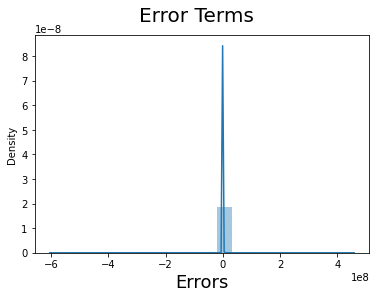

In [ ]:
import seaborn as sns
y_train_price = lr_1.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
ax.set_xlim(-0.5,0.5)
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [ ]:
X_test = df_test[['YearBuilt','SQFTmain','Bedrooms','TotalLandImpValue','(unavailable)','Commercial','Dry Farm','Industrial','Institutional','Irrigated Farm','Miscellaneous','Recreational','Residential']]
y_test = df_test['netTaxableValue']

# Adding constant variable to test dataframe
X_test_m1 = sm.add_constant(X_test)
# Making predictions using the final model
y_pred_m1 = lr_1.predict(X_test_m1)
y_pred_m1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


619646    1.199452e+06
497609    3.722744e+05
268157    8.425005e+07
667451    5.651935e+05
716406    4.116694e+05
              ...     
82442     4.139985e+05
615082    5.768208e+05
69913     3.095077e+05
134207    1.007223e+06
521301    2.787790e+06
Length: 230102, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m1)

0.8190439504677897

In [ ]:
# # Polynomial Regression Model
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# poly_reg = PolynomialFeatures(degree=2)
# X_poly = poly_reg.fit_transform(X_train)
# lin_reg2 = LinearRegression()
# lin_reg2.fit(X_poly,y_train)

### LASSO

In [ ]:
#Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [ ]:
#show best alpha chosen by CV
model.alpha_

31796728993.87842

In [ ]:
# Set best alpha
lasso_best = Lasso( alpha = model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=31796728993.87842)

In [ ]:
#R squared lasso
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 82.51
R squared test set 81.32


In [ ]:
#MSE Lasso
from sklearn.metrics import mean_squared_error

# Training data
pred_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, lasso_best.predict(X_train))
print('MSE training set', round(mse_train, 2))

# Test data
pred = model.predict(X_test)
mse_test =mean_squared_error(y_test, lasso_best.predict(X_test))
print('MSE test set', round(mse_test, 2))

MSE training set 5741112229829.22
MSE test set 5299830949159.2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

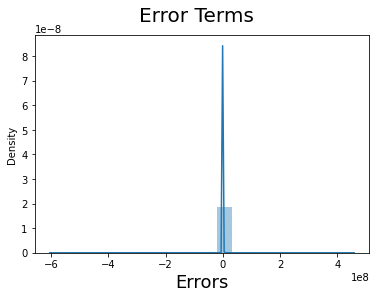

In [ ]:
y_train_price_L = lasso_best.fit(X_train, y_train).predict(X_train)
# Plot the histogram of the error terms
fig = plt.figure()
ax.set_xlim(-0.5,0.5)
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [ ]:
# #SVR
# from sklearn.svm import SVR
# regressor = SVR(kernel='rbf')
# regressor.fit(X_train,y_train)

## Conclusion

In [ ]:
df_final = df4[['YearBuilt','SQFTmain','Bedrooms','TotalLandImpValue','(unavailable)','Commercial','Dry Farm','Industrial','Institutional','Irrigated Farm','Miscellaneous','Recreational','Residential']]
df_final = sm.add_constant(df_final)
df4['Prediction'] = lr_1.predict(df_final)
df4['Profit'] =  df4['Prediction']- df4['netTaxableValue'] 
print(df4['Profit'])

821205   -4.583156e+08
289362   -3.648551e+08
679987   -1.453154e+08
814662   -1.451335e+08
755      -1.422289e+08
              ...     
825270    4.576800e+08
470360    4.805181e+08
440436    4.847238e+08
469286    4.869382e+08
677503    6.036353e+08
Name: Profit, Length: 767004, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
df4.sort_values(by='Profit',inplace=True, ascending=False)
df4

,id,TaxRateArea_CITY,YearBuilt,SQFTmain,Bedrooms,TotalLandImpValue,netTaxableValue,(unavailable),Commercial,Dry Farm,Industrial,Institutional,Irrigated Farm,Miscellaneous,Recreational,Residential,Prediction,Profit
677503,8612454,LOS ANGELES,1963,760946,0,726082047.0,738975.0,0,0,0,0,1,0,0,0,0,6.043743e+08,6.036353e+08
469286,8273251,LOS ANGELES,1997,45135,0,592950834.0,0.0,0,0,0,0,0,0,1,0,0,4.869382e+08,4.869382e+08
440436,8235203,LOS ANGELES,1955,1447077,0,595528648.0,22791191.0,0,0,0,0,1,0,0,0,0,5.075150e+08,4.847238e+08
470360,8274383,LOS ANGELES,1997,802000,0,586021280.0,12154104.0,0,0,0,0,0,0,1,0,0,4.926722e+08,4.805181e+08
825270,30826484,LOS ANGELES,1997,802000,0,557489748.0,11562258.0,0,0,0,0,0,0,1,0,0,4.692422e+08,4.576800e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,5803597,LOS ANGELES,2016,597158,0,821054737.0,825632787.0,0,0,0,0,0,0,0,0,1,6.834038e+08,-1.422289e+08
814662,22644131,LOS ANGELES,1928,33373,0,273382246.0,370348931.0,0,0,0,1,0,0,0,0,0,2.252154e+08,-1.451335e+08
679987,8614938,LOS ANGELES,1921,67126,0,299787559.0,392718800.0,0,0,0,1,0,0,0,0,0,2.474034e+08,-1.453154e+08
289362,7650076,LOS ANGELES,1954,393032,0,458642652.0,747654575.0,0,0,0,1,0,0,0,0,0,3.827994e+08,-3.648551e+08
